In [11]:
ls testing

20_1.jpg  5.jpg           cat1.jpg   dandelion.jpg  rose.jpg       t-shirt.jpg
20.jpg    ankle-boot.jpg  cat2.jpg   dog1.jpg       sunflower.jpg  tulip.jpg
5_1.jpg   bag.jpg         daisy.jpg  dog2.jpg       trousers.jpg


In [ ]:
import re, os, cv2
import numpy as np
rows,cols = 128,128
# ----------------------------------------------------------------------------
def list_files(directory, ext=None):
    return [os.path.join(directory, f) for f in os.listdir(directory)
            if os.path.isfile(os.path.join(directory, f)) and ( ext==None or re.match('([\w_-]+\.(?:' + ext + '))', f) )]

# ----------------------------------------------------------------------------
def load_images(path,label):
    X = []
    Y = []
    label = str(label)
    for fname in list_files( path, ext='jpg' ): 
        img = cv2.imread(fname)
        img = cv2.resize(img, (rows, cols))
        X.append(img)
        Y.append(label)
        
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    return X, Y

In [39]:
X, y = load_images('dogs-cats/dogs',0)
X_aux, y_aux = load_images('dogs-cats/cats',1)
X = np.concatenate((X, X_aux), axis=0)
y = np.concatenate((y, y_aux), axis=0)
print(X.shape)
print(y.shape)

(2000, 128, 128, 3)
(2000,)


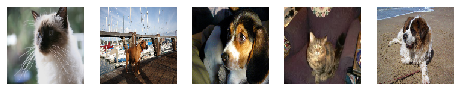

In [40]:
  import random 
  random.seed(42) 
  from matplotlib import pyplot as plt

  for idx in range(5): 
    rnd_index = random.randint(0, X.shape[0]-1)
    plt.subplot(1,5,idx+1)
    plt.imshow(cv2.cvtColor(X[rnd_index],cv2.COLOR_BGR2RGB)) 
    plt.xticks([]),plt.yticks([])
  plt.show()


In [ ]:
from keras import utils as np_utils
X = (X.astype(np.float32))/255.0
X = X.reshape(X.shape[0], rows, cols, 3) 
y = np_utils.to_categorical(y, 2)
input_shape = X.shape[1:]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1600, 128, 128, 3)
(1600, 2)
(400, 128, 128, 3)
(400, 2)


In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, BatchNormalization


In [ ]:
def CNN(input_shape):
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size=(5, 5), padding='same', strides=(2,2), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, kernel_size=(2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(2, 2), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, kernel_size=(2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(2, 2), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(2, activation="softmax"))

    return model

In [45]:
model = CNN(input_shape)

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

ckpt = ModelCheckpoint('model_dogs-cats.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False) 
earlyStopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0,mode='min')

model.fit(x_train, y_train,
          batch_size=8,
          epochs=100,
          verbose=1, 
          validation_data=(x_test, y_test),
          callbacks=[ckpt,earlyStopping]) 

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 10s 6ms/step - loss: 1.2638 - acc: 0.5381 - val_loss: 3.5591 - val_acc: 0.5200
Epoch 2/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.8470 - acc: 0.5750 - val_loss: 0.8408 - val_acc: 0.5550
Epoch 3/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.7466 - acc: 0.6144 - val_loss: 0.6882 - val_acc: 0.6550
Epoch 4/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.7122 - acc: 0.6094 - val_loss: 2.0563 - val_acc: 0.5350
Epoch 5/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6666 - acc: 0.6300 - val_loss: 0.6769 - val_acc: 0.6375
Epoch 6/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6605 - acc: 0.6538 - val_loss: 0.8018 - val_acc: 0.5825
Epoch 7/100
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6386 - acc: 0.6700 - val_loss: 3.0209 - val_acc: 0.5675
Epoch 8

In [46]:
from sklearn import metrics
# Make a prediction
print ("Making predictions...")
model.load_weights('model_dogs-cats.h5')
#y_pred = model.predict(x_test)
y_pred = model.predict(x_test, batch_size=8, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
y_test_aux = y_test.copy()
y_test_pred = list()
for i in y_test_aux:
    y_test_pred.append(np.argmax(i))

print (y_pred)

# Evaluate the prediction
accuracy = metrics.accuracy_score(y_test_pred, y_pred)
precision, recall, f1, support = metrics.precision_recall_fscore_support(y_test_pred, y_pred, average=None)
print('\nFinal results...')
print(metrics.classification_report(y_test_pred, y_pred))
print('Acc      : %.4f' % accuracy)
print('Precision: %.4f' % np.average(precision))
print('Recall   : %.4f' % np.average(recall))
print('F1       : %.4f' % np.average(f1))
print('Support  :', np.sum(support))

Making predictions...
[0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1]

Final results...
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       191
           1       0.73      0.74      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.3
        )

In [ ]:
datagen.fit(x_train)
 
model = CNN(input_shape)
 
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [49]:
model.fit_generator(
          datagen.flow(x_train, y_train, batch_size=8),
          epochs=100,
          verbose=1, 
          validation_data=(x_test, y_test),
          callbacks=[ckpt,earlyStopping],
          steps_per_epoch=len(x_train) // 8,
          workers=4)


Epoch 1/100
200/200 [==============================] - 33s 163ms/step - loss: 1.3516 - acc: 0.5469 - val_loss: 1.1432 - val_acc: 0.5550
Epoch 2/100
200/200 [==============================] - 17s 84ms/step - loss: 0.9548 - acc: 0.5450 - val_loss: 1.9594 - val_acc: 0.5350
Epoch 3/100
200/200 [==============================] - 18s 90ms/step - loss: 0.8061 - acc: 0.5387 - val_loss: 1.1923 - val_acc: 0.5600
Epoch 4/100
200/200 [==============================] - 17s 84ms/step - loss: 0.7484 - acc: 0.5513 - val_loss: 0.6579 - val_acc: 0.6000
Epoch 5/100
200/200 [==============================] - 17s 86ms/step - loss: 0.7342 - acc: 0.5569 - val_loss: 0.9324 - val_acc: 0.6000
Epoch 6/100
200/200 [==============================] - 17s 86ms/step - loss: 0.7331 - acc: 0.5544 - val_loss: 0.9967 - val_acc: 0.5175
Epoch 7/100
200/200 [==============================] - 17s 85ms/step - loss: 0.7333 - acc: 0.5337 - val_loss: 4.7741 - val_acc: 0.5100
Epoch 8/100
200/200 [==============================] -

In [ ]:
from keras.models import load_model
model = load_model('model_dogs-cats.h5')


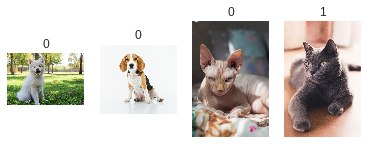

In [51]:
images = ['dog1.jpg', 'dog2.jpg', 'cat1.jpg', 'cat2.jpg'] 
 
for number in range(len(images)):
  imgLoaded = cv2.imread('testing/%s'%(images[number])) 
  img = cv2.resize(imgLoaded, (rows, cols)) 
  img = (img.astype(np.float32))/255.0 
  img = img.reshape(1, rows, cols, 3) 
  
  plt.subplot(1,5,number+1),plt.imshow(cv2.cvtColor(imgLoaded,cv2.COLOR_BGR2RGB))
  plt.title(np.argmax(model.predict(img)[0])) 
  plt.xticks([]),plt.yticks([]) 
fig = plt.gcf()
plt.show()
